In [0]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym.envs.registration import register

In [0]:
# register(
#   id = 'FrozenLake-v0',
#   entry_point = "gym.envs.toy_text:FrozenLakeEnv",
#   kwargs = {'map_name': '4x4'}
# )

env = gym.make('FrozenLake-v0')

In [0]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
rList = []

learning_rate = 0.7
discount = 0.85
num_episodes = 10000

for step in range(num_episodes):
  state = env.reset()
  rAll = 0
  done = False
  
  while not done:
    action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (step + 1))
      
    new_state, reward, done, _ = env.step(action)
    Q[state, action] = (1-learning_rate) * Q[state, action] \
              + learning_rate * (reward + discount * np.max(Q[new_state, :]))
    
    rAll += reward
    state = new_state
  rList.append(rAll)

Succes rate: 0.4749
Final Q-Table Values
LEFT DOWN RIGHT UP
[[6.59998559e-04 8.64341846e-03 2.40536421e-04 3.36039646e-04]
 [6.14348923e-06 6.96994669e-05 1.41894766e-04 1.23861357e-02]
 [4.81111850e-02 1.09726293e-04 1.25948978e-04 1.01741607e-04]
 [3.28853826e-05 1.30531355e-04 4.92887945e-05 1.02662225e-04]
 [2.30277260e-02 2.67587619e-05 1.50451628e-04 6.19004653e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.21394559e-05 1.69351769e-06 2.19155695e-02 1.43496072e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.00581810e-05 1.79051858e-04 2.00180682e-04 6.69442720e-02]
 [3.54202933e-04 3.50499079e-01 5.83940222e-04 3.85619006e-04]
 [1.71177618e-01 2.02395291e-04 1.87920611e-04 1.82429840e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.88399148e-05 1.11258132e-05 4.36890021e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.45875796e-01 0.00000000e

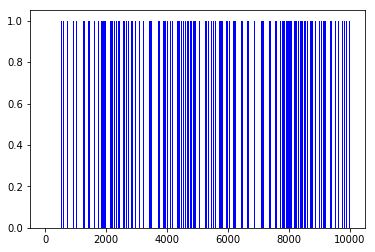

In [0]:
print("Succes rate: {}".format(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)

plt.bar(range(len(rList)), rList, color='blue')
plt.show()